# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [468]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [469]:
# %matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


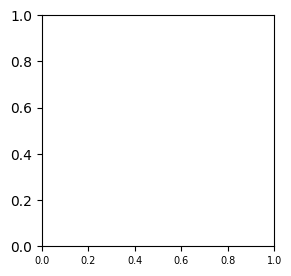

In [470]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

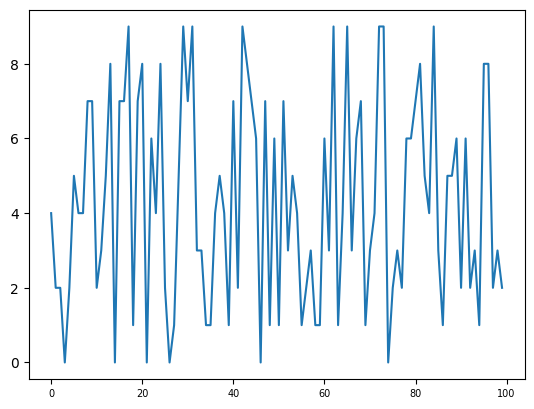

In [471]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

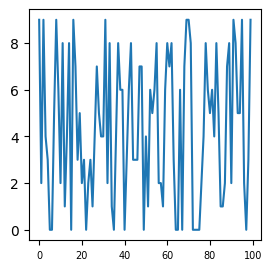

In [472]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

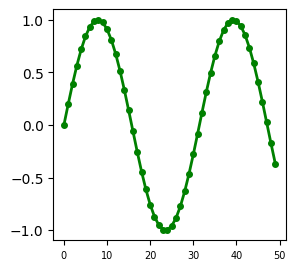

In [473]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
# y = np.sin(x / 5 - 1)
# plt.plot(x, y)
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

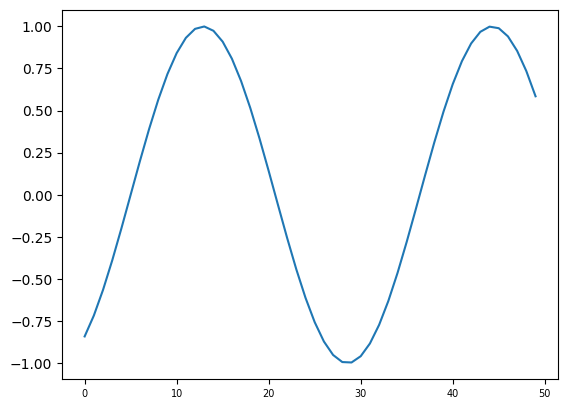

In [474]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


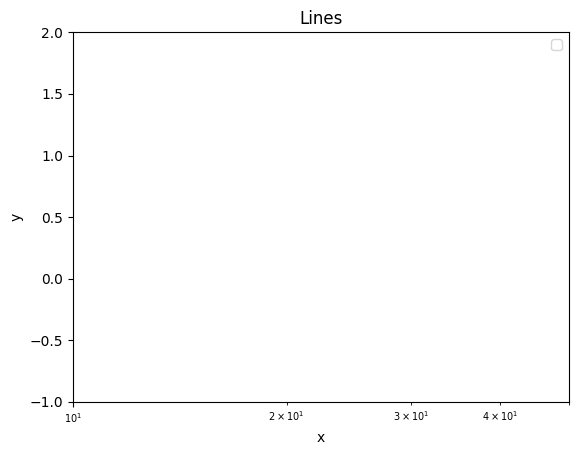

In [475]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

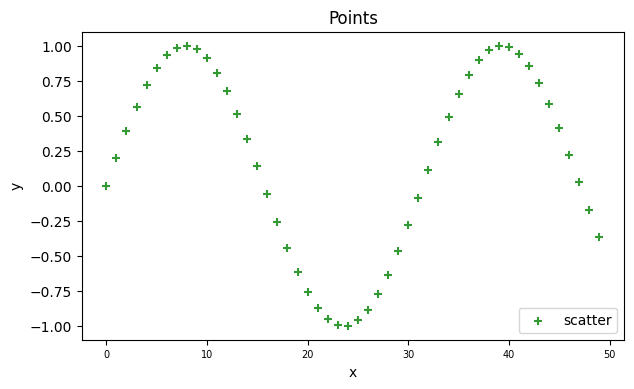

In [476]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

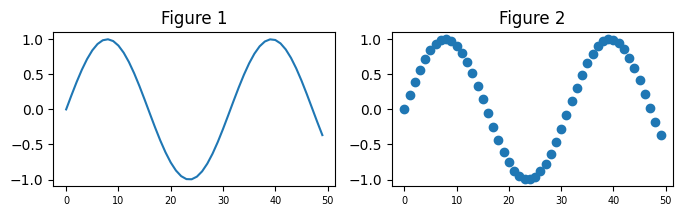

In [477]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

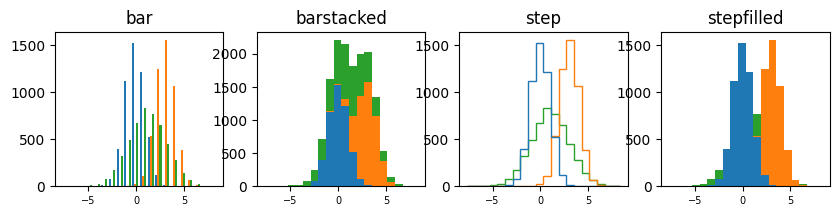

In [478]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

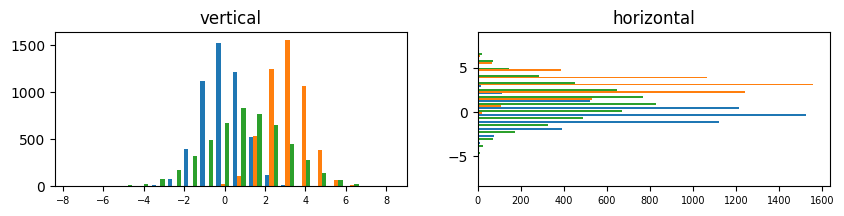

In [479]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [480]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.947452,0.079031,0.611038,0.421641,0.231728,0.383499,0.786844,0.809298,0.160188,0.171341
1,0.009315,0.502634,0.093555,0.639922,0.711083,0.781717,0.384267,0.602835,0.149301,0.767319
2,0.761659,0.998981,0.872819,0.415947,0.226802,0.471406,0.823367,0.420922,0.741875,0.731720
3,0.883484,0.509562,0.221084,0.651858,0.186547,0.191475,0.539801,0.816217,0.198367,0.134161
4,0.731104,0.609252,0.949418,0.717624,0.490413,0.803366,0.887338,0.873649,0.912593,0.446960


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

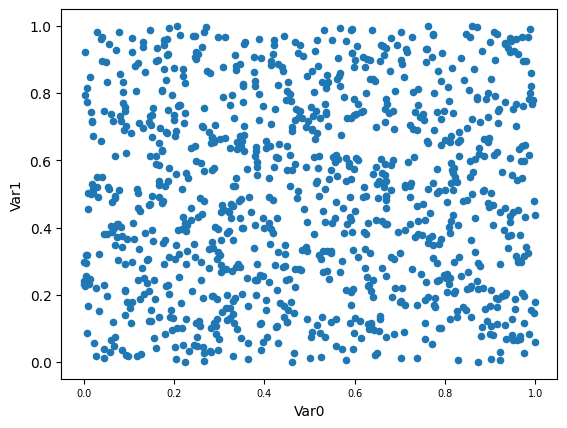

In [481]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

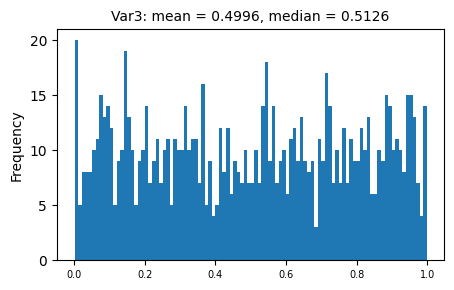

In [482]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

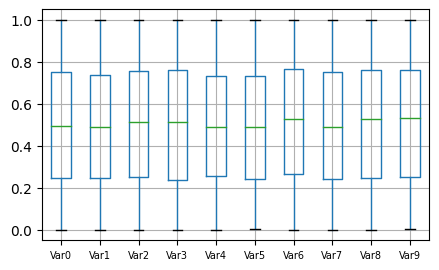

In [483]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

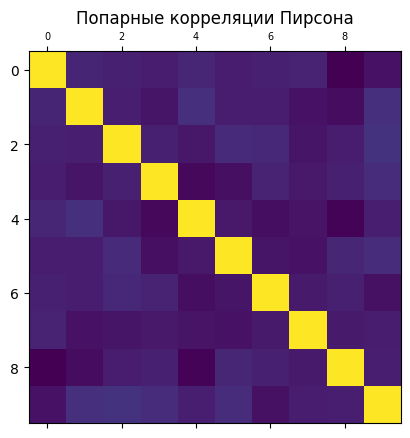

In [484]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

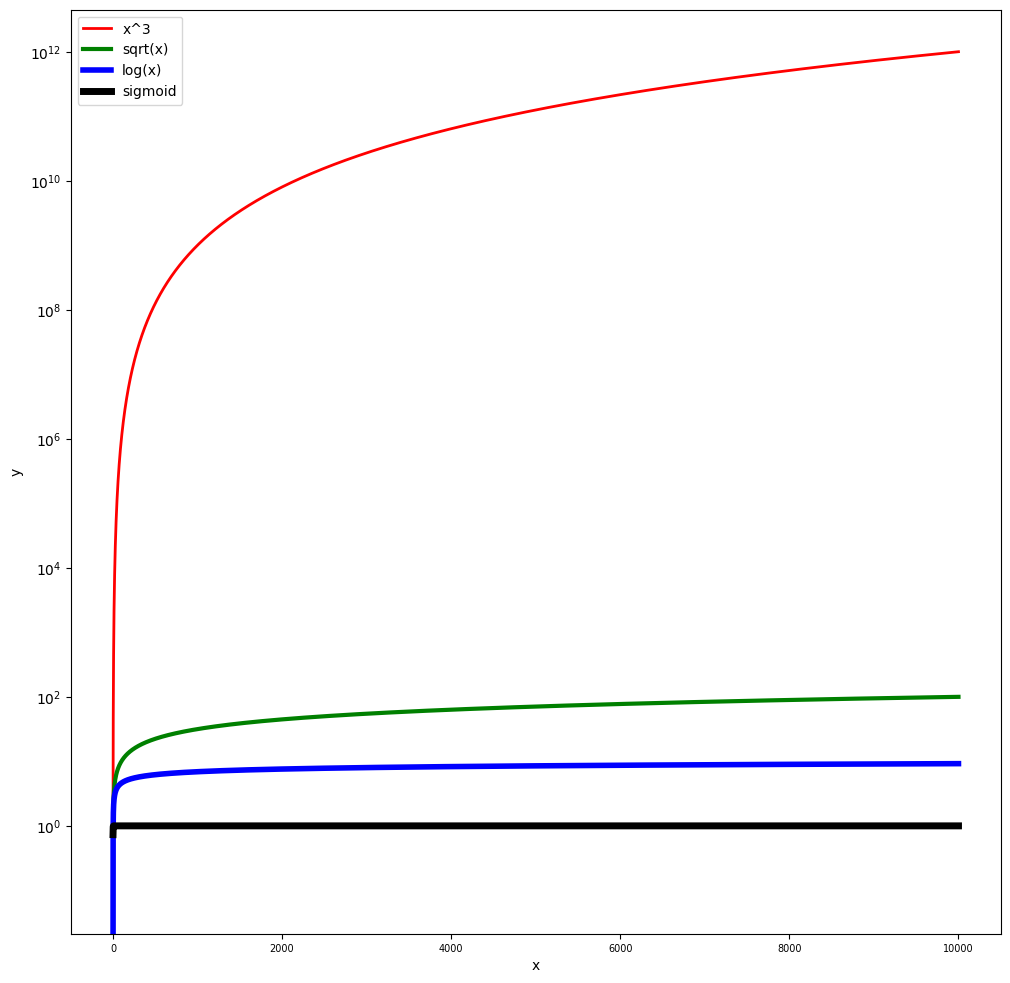

In [485]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))
plt.yscale('log') # Choose the right scale else the sigmoid is hardly visible

x = np.arange(1, 10000, 0.1)

# Plot cubic parabola y = x^3
plt.plot(x, x**3, color='red', linewidth=2, label='x^3')

# Plot square root
plt.plot(x, np.sqrt(x), color='green', linewidth=3, label='sqrt(x)')

# Plot logarithm
plt.plot(x, np.log(x), color='blue', linewidth=4, label='log(x)')

# Plot sigmoid
plt.plot(x, 1/(1+np.exp(-x)), color='black', linewidth=5, label='sigmoid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [486]:
# напишите здесь ваш код

# Create dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Add 50 normally distributed columns
for i in range(50):
    mean = i
    std = i + 1
    col_name = 'col_{}'.format(i)
    df[col_name] = np.random.normal(mean, std, 1000)

df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.014405,0.932102,1.823120,2.942192,3.916056,4.926130,5.927657,6.755440,7.868520,9.238408,...,40.948209,40.608821,41.472070,42.598970,42.052549,45.615974,45.934285,46.990310,46.067308,49.283580
std,0.995146,2.016173,3.136478,3.932131,4.987977,5.897184,6.946590,8.300614,8.972871,10.541711,...,41.674574,43.437139,42.910418,45.104877,44.632598,46.972953,48.189575,48.301111,48.682906,50.279619
min,-3.099709,-5.016934,-8.466482,-10.055204,-13.200085,-15.058358,-22.804769,-19.328184,-19.391452,-24.449727,...,-101.899698,-101.649849,-105.064436,-100.828850,-82.272712,-116.617986,-84.626560,-107.533190,-128.557847,-125.377912
25%,-0.665045,-0.472416,-0.383687,0.524936,0.477582,0.894845,1.285418,1.402126,1.748202,1.960510,...,13.039974,10.645516,12.847367,11.409334,10.396304,12.589148,15.029328,15.302158,11.927871,14.003143
50%,0.031177,0.810687,1.836396,2.822940,4.007492,4.721572,6.006966,6.617762,8.060638,9.042692,...,39.684342,39.787255,42.852459,42.263434,41.820271,48.053781,47.454089,46.889154,46.644866,51.146798
75%,0.667023,2.348172,3.937773,5.631023,7.298299,9.029231,10.714568,12.102109,13.976683,16.246375,...,67.654703,69.775774,68.176912,73.528387,73.627442,77.856756,77.583341,80.163047,78.026134,83.480142
max,3.410043,6.874654,10.746337,16.579827,21.317545,24.002782,29.422735,40.023722,36.064105,41.667714,...,227.023861,214.142968,199.045887,200.155767,177.130146,179.041455,191.842330,217.230915,209.978867,212.838406


3. Определите медианы и стандартные отклонения для всех колонок.

In [487]:
# напишите здесь ваш код
result = None

columns = df.columns
indices = ['std', 'median']
result = pd.DataFrame(np.empty(shape=(len(indices), len(columns))), columns=columns, index=indices)

result.loc['std'] = df.apply(np.std, axis=0)
result.loc['median'] = df.apply(np.median, axis=0)

result


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
std,0.994649,2.015165,3.134910,3.930165,4.985483,5.894234,6.943115,8.296463,8.968384,10.536439,...,41.653732,43.415415,42.888958,45.082319,44.610276,46.949461,48.165475,48.276955,48.658558,50.254473
median,0.031177,0.810687,1.836396,2.822940,4.007492,4.721572,6.006966,6.617762,8.060638,9.042692,...,39.684342,39.787255,42.852459,42.263434,41.820271,48.053781,47.454089,46.889154,46.644866,51.146798


4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

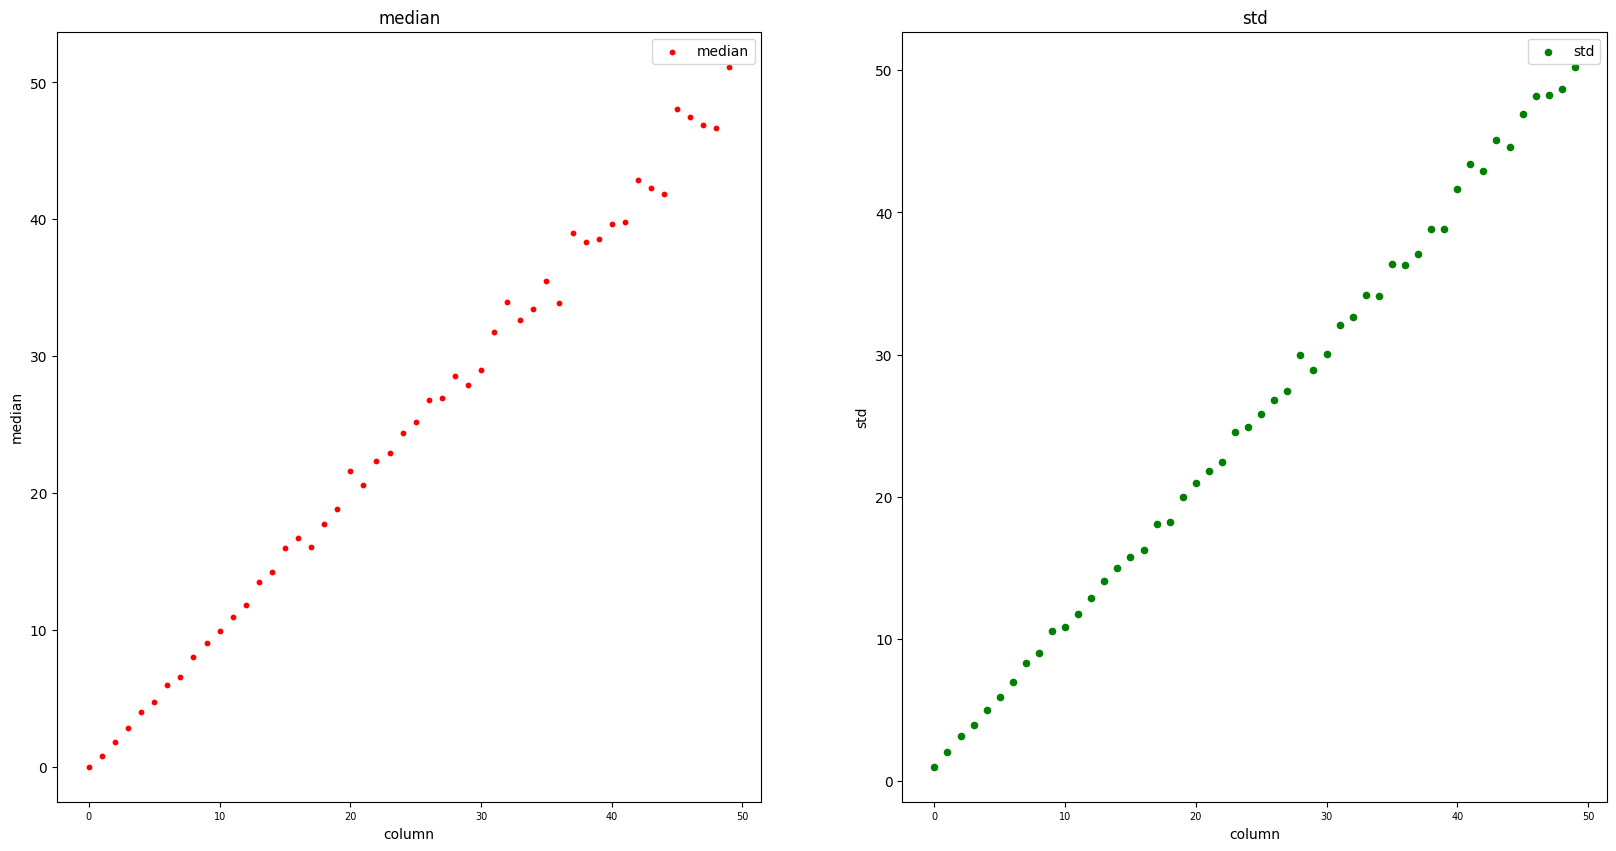

In [488]:
# напишите здесь ваш код
import matplotlib

matplotlib.rc('xtick', labelsize=7)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

plt.scatter(np.arange(0, len(result.columns)), result.loc['median'], color='red', s=10, label='median')

plt.title('median')
plt.xlabel('column')
plt.ylabel('median')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(np.arange(0, len(result.columns)), result.loc['std'], color='green', s=20, label='std')

plt.title('std')
plt.xlabel('column')
plt.ylabel('std')
plt.legend()

plt.show()

5. Постройте boxplot для любых 10 колонок.

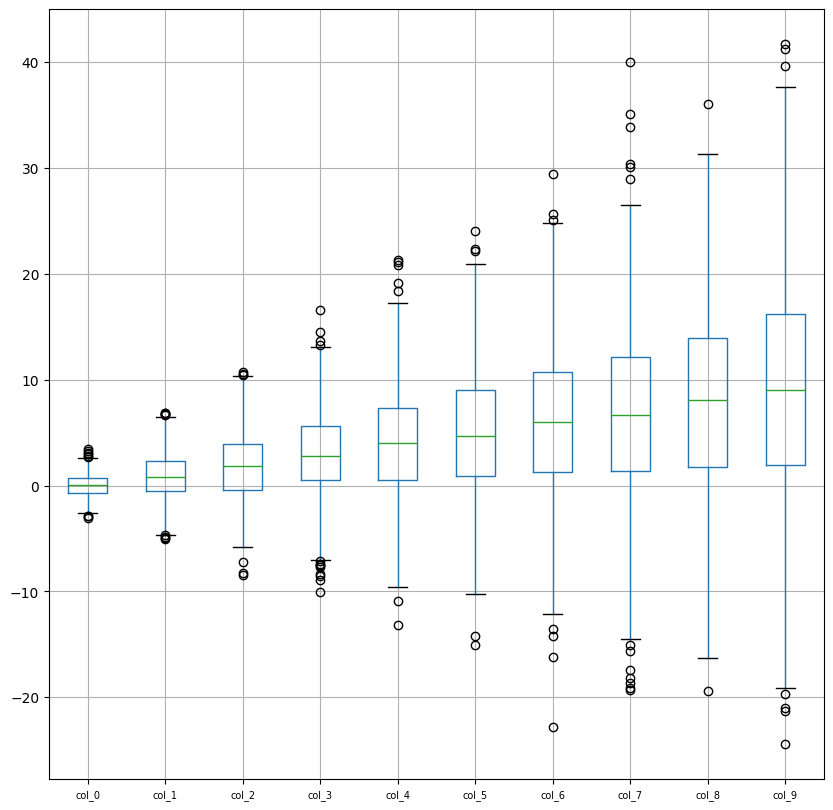

In [489]:
# напишите здесь ваш код
plt.figure(figsize=(10,10))
df.boxplot(column = list(df.columns[0:10]))
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [490]:
# напишите здесь ваш код

# Создаем таблицу с 1000 колонками и 1000 строками
data = np.random.uniform(0, 1, size=(1000, 1000))

# Преобразуем массив данных в DataFrame с помощью pandas
df = pd.DataFrame(data)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.486094,0.500164,0.498061,0.493534,0.494692,5.073241e-01,0.501772,0.508410,0.500585,0.511791,...,0.488516,0.491447,0.502956,0.515097,0.497928,0.516464,0.497390,0.509255,0.506932,0.502908
std,0.287889,0.287650,0.287375,0.284008,0.280774,2.910958e-01,0.288268,0.292687,0.284681,0.285668,...,0.291005,0.282936,0.282794,0.286458,0.282766,0.287730,0.290709,0.281856,0.289092,0.288581
min,0.001555,0.000087,0.000667,0.002301,0.000128,8.668999e-07,0.001171,0.000916,0.001191,0.001090,...,0.000478,0.000333,0.003327,0.000511,0.000006,0.000309,0.000056,0.000020,0.000466,0.001439
25%,0.225872,0.250061,0.244648,0.264008,0.252708,2.541790e-01,0.248606,0.257984,0.265767,0.265829,...,0.232845,0.250129,0.272039,0.265138,0.268037,0.264402,0.245683,0.271520,0.255909,0.254541
50%,0.482686,0.501648,0.504698,0.491664,0.501187,5.046068e-01,0.512234,0.505125,0.500818,0.510377,...,0.491478,0.489058,0.507888,0.527609,0.482631,0.513391,0.495355,0.523589,0.512978,0.509306
75%,0.732900,0.758647,0.736415,0.735029,0.729165,7.623816e-01,0.738941,0.766664,0.749360,0.757644,...,0.741740,0.736858,0.740411,0.760981,0.740344,0.769493,0.747152,0.744191,0.753967,0.749404
max,0.999919,0.998671,0.999256,0.999151,0.999925,9.989674e-01,0.997910,0.999293,0.999940,0.998597,...,0.999039,0.998209,0.999147,0.998862,0.999220,1.000000,0.999448,0.999578,0.997874,0.998794


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

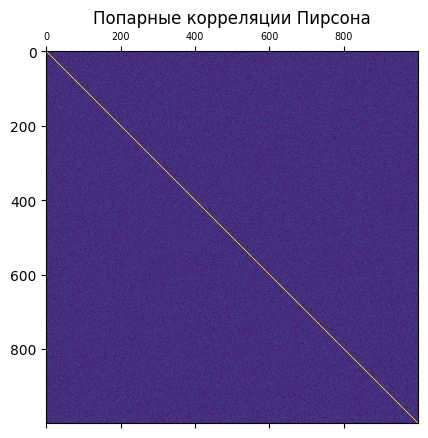

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,-0.049089,0.007702,0.004840,-0.003877,0.059123,0.001787,0.056813,-0.066384,-0.015924,...,0.004301,0.019533,0.011156,0.025507,0.032642,-0.041049,-0.023632,-0.016376,0.021105,-0.022747
1,-0.049089,1.000000,-0.006277,-0.049409,-0.001196,-0.007719,-0.009191,0.012388,-0.011857,-0.028581,...,-0.004599,-0.018418,-0.039366,0.002850,-0.009634,0.020969,-0.006338,0.000255,0.016105,-0.045707
2,0.007702,-0.006277,1.000000,0.051786,0.035253,-0.028323,0.013289,-0.066060,-0.010625,0.019609,...,0.025873,-0.006845,0.011051,-0.003501,-0.028981,-0.005171,-0.016376,-0.038078,0.038534,0.045064
3,0.004840,-0.049409,0.051786,1.000000,0.048625,-0.021970,0.015635,0.023920,0.015457,0.021098,...,0.034506,0.039859,0.001473,0.012687,0.072022,-0.025524,0.059327,-0.021593,0.000042,-0.024369
4,-0.003877,-0.001196,0.035253,0.048625,1.000000,0.017133,-0.001074,0.018854,-0.011362,0.017126,...,-0.006242,-0.010364,-0.013684,-0.049584,0.092555,0.013220,0.031603,-0.040568,-0.031532,-0.023397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.041049,0.020969,-0.005171,-0.025524,0.013220,0.016070,0.034063,-0.069748,0.010853,-0.017306,...,-0.004582,0.000378,-0.017328,0.017231,0.038391,1.000000,0.013948,0.021700,-0.014509,-0.006999
996,-0.023632,-0.006338,-0.016376,0.059327,0.031603,-0.003916,-0.037053,0.031187,0.018753,-0.034093,...,0.040186,0.021192,0.012877,0.009753,0.040144,0.013948,1.000000,-0.008979,-0.055316,-0.018266
997,-0.016376,0.000255,-0.038078,-0.021593,-0.040568,0.015788,-0.087926,0.023447,0.056768,-0.023391,...,0.025964,0.008002,-0.022594,-0.018320,0.060135,0.021700,-0.008979,1.000000,-0.038746,0.019344
998,0.021105,0.016105,0.038534,0.000042,-0.031532,-0.026737,-0.025249,-0.015022,-0.027925,0.091649,...,0.051591,0.008606,-0.032553,0.030772,0.046489,-0.014509,-0.055316,-0.038746,1.000000,-0.021405


In [491]:
corr = df.corr()
plt.matshow(corr)
plt.title('Попарные корреляции Пирсона')
plt.show()
corr
# continuous below

In [492]:
corr_no_lower_tri = corr

# Remove duplicates
corr_no_lower_tri.values[np.tril_indices_from(corr_no_lower_tri.values)] = 0

corr_no_lower_tri

# continuous below

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,-0.049089,0.007702,0.004840,-0.003877,0.059123,0.001787,0.056813,-0.066384,-0.015924,...,0.004301,0.019533,0.011156,0.025507,0.032642,-0.041049,-0.023632,-0.016376,0.021105,-0.022747
1,0.0,0.000000,-0.006277,-0.049409,-0.001196,-0.007719,-0.009191,0.012388,-0.011857,-0.028581,...,-0.004599,-0.018418,-0.039366,0.002850,-0.009634,0.020969,-0.006338,0.000255,0.016105,-0.045707
2,0.0,0.000000,0.000000,0.051786,0.035253,-0.028323,0.013289,-0.066060,-0.010625,0.019609,...,0.025873,-0.006845,0.011051,-0.003501,-0.028981,-0.005171,-0.016376,-0.038078,0.038534,0.045064
3,0.0,0.000000,0.000000,0.000000,0.048625,-0.021970,0.015635,0.023920,0.015457,0.021098,...,0.034506,0.039859,0.001473,0.012687,0.072022,-0.025524,0.059327,-0.021593,0.000042,-0.024369
4,0.0,0.000000,0.000000,0.000000,0.000000,0.017133,-0.001074,0.018854,-0.011362,0.017126,...,-0.006242,-0.010364,-0.013684,-0.049584,0.092555,0.013220,0.031603,-0.040568,-0.031532,-0.023397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013948,0.021700,-0.014509,-0.006999
996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008979,-0.055316,-0.018266
997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.038746,0.019344
998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.021405


In [493]:
# Get indices (col1, col2) of maximums
maximums = corr_no_lower_tri.abs().idxmax().items()

from collections import namedtuple

Corr = namedtuple("Corr", ["col1", "col2", "corr"])

corr = []

# zip indices and values obtained by that indices
for maximum_idx, corr_value in zip(maximums, corr_no_lower_tri.abs().max().values):
  corr.append(Corr(col1=maximum_idx[0], col2=maximum_idx[1], corr=corr_value))

# Get the four hightest correlations
corr4 = sorted(corr, reverse=True, key=lambda x: x.corr)[0:4]

# Replace abs corr with real correlation
real_corr4 = []
for el in corr4:
  real_corr4.append(Corr(col1=el.col1, col2=el.col2, corr=corr_no_lower_tri.loc[el.col2, el.col1]))

corr4 = real_corr4

8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

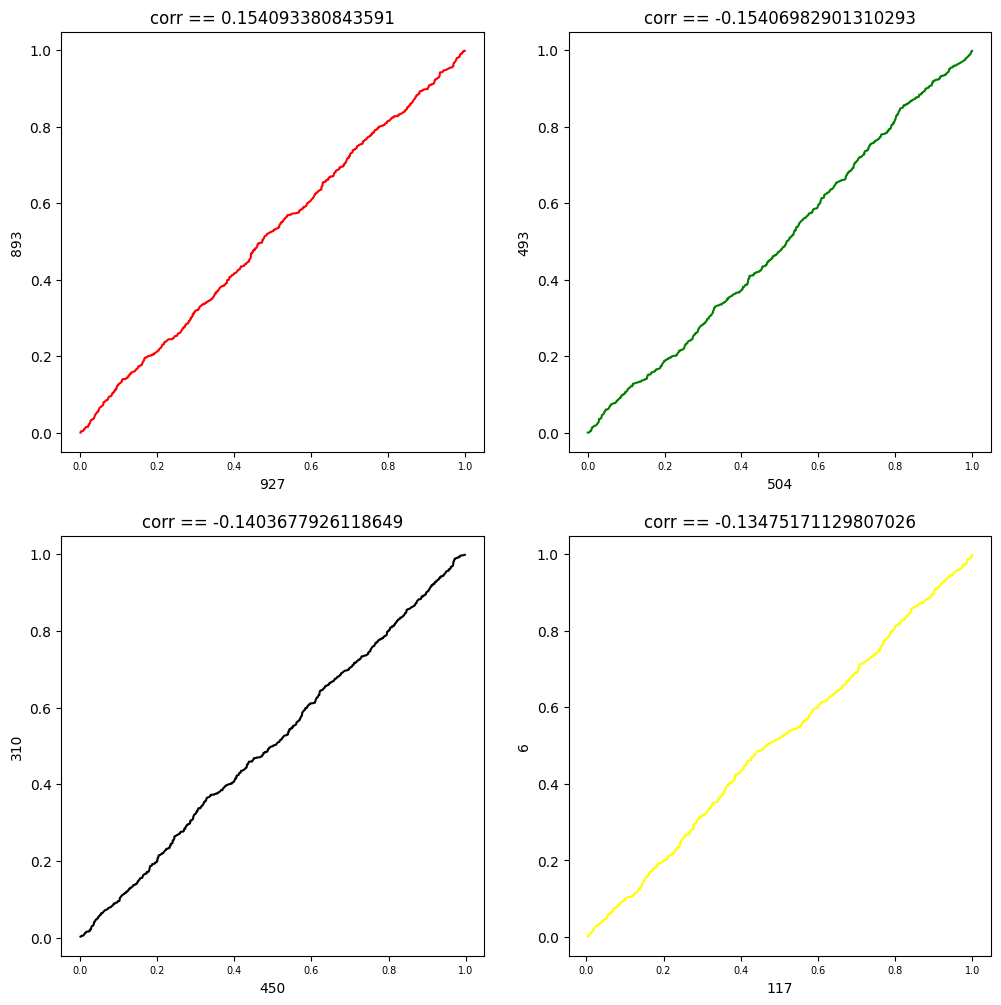

In [494]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)

def plot(corr_item: Corr, color: str):
  plt.plot(sorted(df[corr_item.col1]), sorted(df[corr_item.col2]), color=color)

  plt.title(f'corr == {corr_item.corr}')
  plt.xlabel(corr_item.col1)
  plt.ylabel(corr_item.col2)

plot(corr4[0], 'red')

plt.subplot(2,2,2)
plot(corr4[1], 'green')

plt.subplot(2,2,3)
plot(corr4[2], 'black')

plt.subplot(2,2,4)
plot(corr4[3], 'yellow')

plt.show()

9.  Сделайте вывод о скоррелированности этих случайных величин.

    В соответствии с лекции
    |$r_{xy}$| < 0.19 - очень слабая корреляция

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")